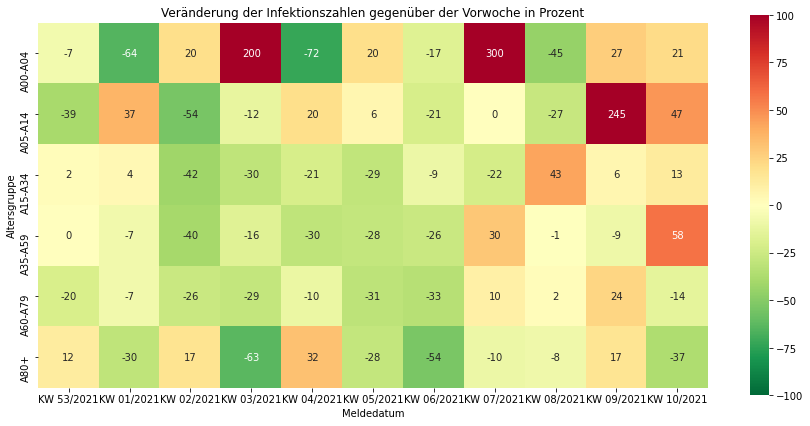

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

URL = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv?where=Landkreis%20%3D%20%27SK%20Dresden%27"

docs = pd.read_csv( URL, parse_dates=["Meldedatum"])
weekly = docs.set_index("Meldedatum").groupby("Altersgruppe").resample("W").agg({"AnzahlFall":"sum"}).fillna(0)
weekly_pct = weekly.pct_change() * 100
weekly_pcts = weekly_pct.reset_index().pivot(index='Altersgruppe', columns='Meldedatum', values='AnzahlFall')
weekly_pcts = weekly_pcts.loc[ weekly_pcts.index != "unbekannt" ] 
cols = [ X for X in weekly_pcts.columns if X.year == 2021 and X != max(weekly_pcts.columns) ]
weekly_pcts = weekly_pcts[ cols ]
xticklabels = [ "KW "+X.strftime("%V/%Y") for X in weekly_pcts.columns ]
fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharex=True, facecolor='white')
ax.set_title('Veränderung der Infektionszahlen gegenüber der Vorwoche in Prozent')
sns.heatmap(weekly_pcts,cmap=cm.RdYlGn.reversed(), xticklabels=xticklabels, vmax=100, vmin=-100, annot=True, fmt=".0f", square=True)
plt.savefig("" + "dd_ag.png", dpi=100, facecolor='white', transparent=False)